In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
data=pd.read_excel("/content/drive/MyDrive/GlobalSuperstore2.xlsx")
print(data)

       Row ID         Order ID  Order Date   Ship Date       Ship Mode  \
0       32298   CA-2012-124891  31-07-2012  31-07-2012        Same Day   
1       26341    IN-2013-77878  05-02-2013  07-02-2013    Second Class   
2       25330    IN-2013-71249  17-10-2013  18-10-2013     First Class   
3       13524  ES-2013-1579342  28-01-2013  30-01-2013     First Class   
4       47221     SG-2013-4320  05-11-2013  06-11-2013        Same Day   
...       ...              ...         ...         ...             ...   
51285   29002    IN-2014-62366  19-06-2014  19-06-2014        Same Day   
51286   35398   US-2014-102288  20-06-2014  24-06-2014  Standard Class   
51287   40470   US-2013-155768  02-12-2013  02-12-2013        Same Day   
51288    9596   MX-2012-140767  18-02-2012  22-02-2012  Standard Class   
51289    6147   MX-2012-134460  22-05-2012  26-05-2012    Second Class   

      Customer ID     Customer Name      Segment           City  \
0        RH-19495       Rick Hansen     Cons

In [6]:
data.shape

(51290, 24)

In [7]:
data.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [13]:
boughts = data.groupby('Product Name').agg({'Quantity': 'sum'}).sort_values('Quantity',ascending=False)[:10]
boughts

,Quantity
Product Name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

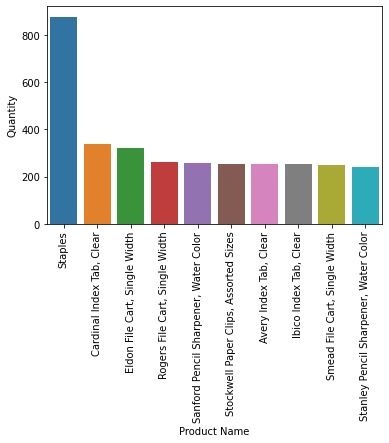

In [15]:
sns.barplot(x='Product Name',y='Quantity',data=boughts.reset_index())
plt.xticks(rotation = 'vertical')

In [18]:
productSales = pd.DataFrame(data.groupby('Product Name').sum()['Sales'])
productSales.sort_values(by=['Sales'], inplace=True, ascending=False)
productSales.head(10)

,Sales
Product Name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


In [19]:
profitable_products = pd.DataFrame(data.groupby(['Product Name']).sum()['Profit'])
profitable_products.sort_values(by=['Profit'], inplace = True, ascending = False)
profitable_products.head(10)

,Profit
Product Name,
Canon imageCLASS 2200 Advanced Copier,25199.9280
"Cisco Smart Phone, Full Size",17238.5206
"Motorola Smart Phone, Full Size",17027.1130
"Hoover Stove, Red",11807.9690
"Sauder Classic Bookcase, Traditional",10672.0730
"Harbour Creations Executive Leather Armchair, Adjustable",10427.3260
"Nokia Smart Phone, Full Size",9938.1955
"Cisco Smart Phone, with Caller ID",9786.6408
"Nokia Smart Phone, with Caller ID",9465.3257


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

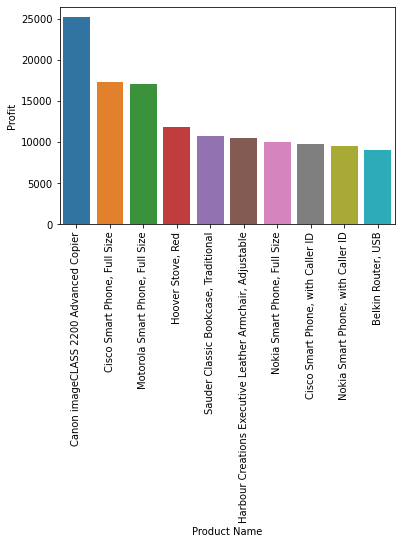

In [20]:
sns.barplot(x='Product Name',y='Profit',data=profitable_products.head(10).reset_index())
plt.xticks(rotation = 'vertical')

In [22]:
data.groupby(['Category','Sales']).sum()

Row ID  Postal Code  Quantity  Discount     Profit  \
Category   Sales                                                           
Furniture  1.892       39480      60653.0         1       0.6    -0.9933   
           1.988       32655      76106.0         1       0.6    -1.4413   
           2.032       34630      60653.0         1       0.6    -1.3208   
           2.328       72261     154082.0         4       1.2    -1.5132   
           2.784       35597      32303.0         2       0.2     0.4176   
...                      ...          ...       ...       ...        ...   
Technology 10499.970   35487      19711.0         3       0.0  5039.9856   
           11199.968   33920      10024.0         4       0.2  3919.9888   
           13999.960   39450      98115.0         4       0.0  6719.9808   
           17499.950   38123      47905.0         5       0.0  8399.9760   
           22638.480   33994      32216.0         6       0.5 -1811.0784   

                      Shipping Cost  
Category   Sales                     
Furniture  1.892               0.18  
           1.988               0.17  
           2.032               0.10  
           2.328               0.38  
           2.784               0.14  
...                             ...  
Technology 10499.970         363.19  
           11199.968          45.98  
           13999.960          20.00  
           17499.950         349.07  
           22638.480          24.29  

[25745 rows x 6 columns]

In [23]:
profitable_category = pd.DataFrame(data.groupby(['Category']).sum()['Profit'])
profitable_category.sort_values(by=['Profit'], inplace = True, ascending = False)
profitable_category

,Profit
Category,
Technology,663778.73318
Office Supplies,518473.83430
Furniture,285204.72380


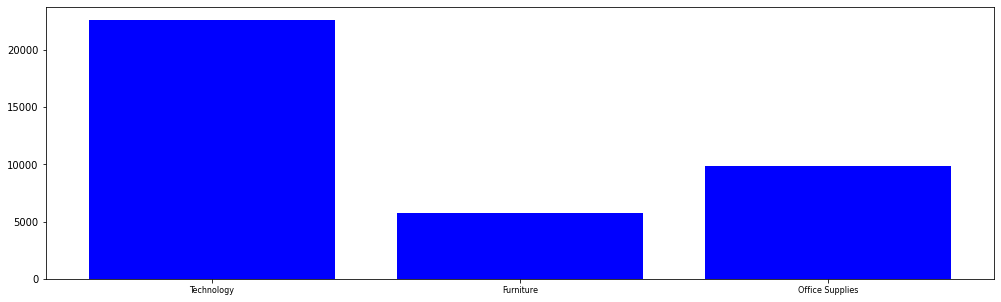

In [25]:
plt.figure(figsize=(17, 5))
plt.bar(data['Category'],data['Sales'],color = 'b')
plt.xticks(size=8)
plt.show()

In [28]:
data.groupby(['Category','Sub-Category']).sum()

Row ID  Postal Code         Sales  Quantity  \
Category        Sub-Category                                                   
Furniture       Bookcases      54830391   12771539.0  1.466572e+06      8310   
                Chairs         79915221   34936229.0  1.501682e+06     12336   
                Furnishings    84110487   51880430.0  3.855783e+05     11225   
                Tables         22631821   18607828.0  7.570419e+05      3083   
Office Supplies Appliances     46751657   25250538.0  1.011064e+06      6078   
                Art           134705372   43329658.0  3.720920e+05     16301   
                Binders       168636619   83626398.0  4.619115e+05     21429   
                Envelopes      56221713   13325731.0  1.709043e+05      8380   
                Fasteners      56876988   12506063.0  8.324232e+04      8390   
                Labels         63118097   19552985.0  7.340403e+04      9322   
                Paper          97085263   76299221.0  2.442917e+05     12822   
                Storage       135263903   46248720.0  1.127086e+06     16917   
                Supplies       56727112   10633558.0  2.430742e+05      8543   
Technology      Accessories    79332919   44468434.0  7.492370e+05     10946   
                Copiers        48446805    3873477.0  1.509436e+06      7454   
                Machines       41730274    6364668.0  7.790601e+05      4906   
                Phones         88973053   47897175.0  1.706824e+06     11870   

                              Discount        Profit  Shipping Cost  
Category        Sub-Category                                         
Furniture       Bookcases      370.710  161924.41950      155482.23  
                Chairs         560.120  140396.26750      164229.85  
                Furnishings    478.880   46967.42550       40747.12  
                Tables         250.320  -64083.38870       79861.46  
Office Supplies Appliances     248.700  141680.58940      108300.78  
                Art            573.080   57953.91090       41287.47  
                Binders       1102.480   72449.84600       48181.99  
                Envelopes      320.810   29601.11630       18547.78  
                Fasteners      340.240   11525.42410        9053.59  
                Labels         313.890   15010.51200        8059.88  
                Paper          387.300   59207.68270       26661.29  
                Storage        700.490  108461.48980      120546.46  
                Supplies       310.200   22583.26310       24812.05  
Technology      Accessories    370.480  129626.30620       83513.58  
                Copiers        260.418  258567.54818      159496.49  
                Machines       252.000   58867.87300       79135.90  
                Phones         489.610  216717.00580      184902.77

In [29]:
data.groupby(["Category", "Sub-Category"], as_index=False)["Quantity"].count()

,Category,Sub-Category,Quantity
0,Furniture,Bookcases,2411
1,Furniture,Chairs,3434
2,Furniture,Furnishings,3170
3,Furniture,Tables,861
4,Office Supplies,Appliances,1755
5,Office Supplies,Art,4883
6,Office Supplies,Binders,6152
7,Office Supplies,Envelopes,2435
8,Office Supplies,Fasteners,2420
9,Office Supplies,Labels,2606


In [31]:
profitable_segment = pd.DataFrame(data.groupby(['Segment']).sum()['Profit'])
profitable_segment.sort_values(by=['Profit'], inplace = True, ascending = False)
profitable_segment

,Profit
Segment,
Consumer,749239.78206
Corporate,441208.32866
Home Office,277009.18056


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

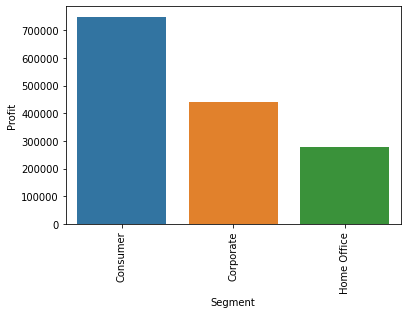

In [32]:
sns.barplot(x='Segment',y='Profit',data=profitable_segment.reset_index())
plt.xticks(rotation = 'vertical')

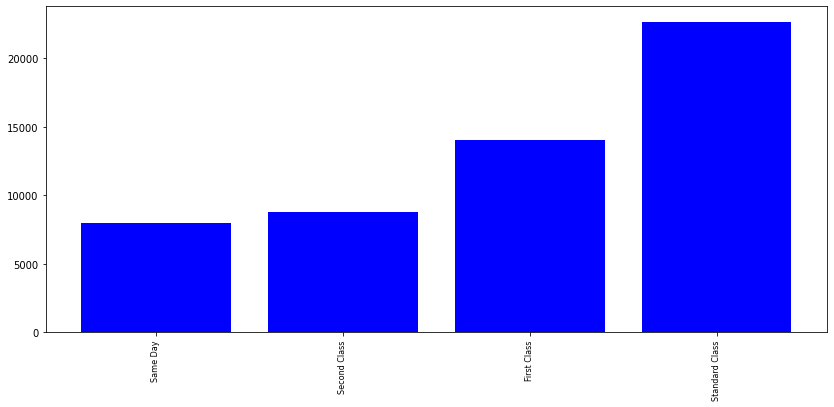

In [33]:
plt.figure(figsize=(14, 6))
plt.bar(data['Ship Mode'],data['Sales'],color = 'b')
plt.xticks(rotation='vertical', size=8)
plt.show()

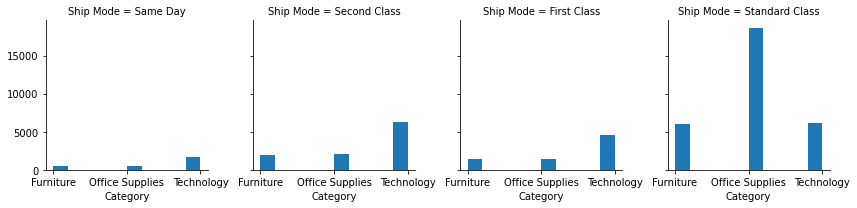

In [35]:
category_hist = sns.FacetGrid(data, col='Ship Mode', palette='rainbow')
category_hist.map(plt.hist, 'Category')

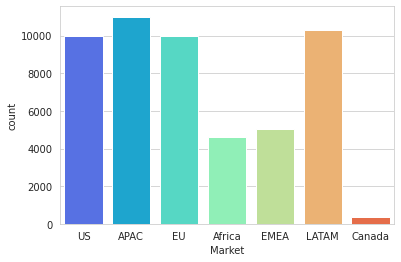

In [36]:
sns.set_style('whitegrid')
sns.countplot(x='Market',data=data, palette='rainbow')

In [37]:
countries = pd.DataFrame(data.groupby('Country').sum()['Sales'])
countries.sort_values('Sales',inplace=True, ascending=False)
countries.head(10)

,Sales
Country,
United States,2.297201e+06
Australia,9.252359e+05
France,8.589311e+05
China,7.005620e+05
Germany,6.288400e+05
Mexico,6.225906e+05
India,5.896501e+05
United Kingdom,5.285763e+05
Indonesia,4.048875e+05


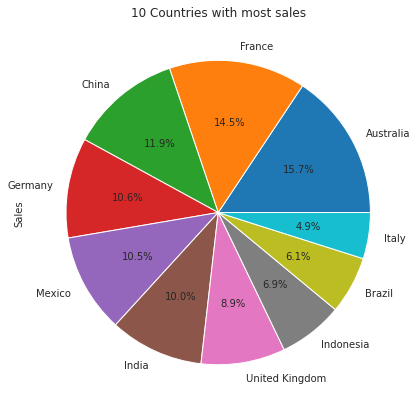

In [38]:
countries = countries.sort_values(by = 'Sales',ascending = False)[1:11]
countries['Sales'].plot(kind='pie',autopct='%1.1f%%',figsize=(14,7))
plt.title('10 Countries with most sales')
plt.show()

In [40]:
data.groupby('Country').agg({'Shipping Cost':'mean'}).sort_values('Shipping Cost', ascending=False).head(10)

,Shipping Cost
Country,
Taiwan,155.660714
Chad,148.970000
Lesotho,135.650000
Montenegro,93.937500
Slovenia,61.220000
Republic of the Congo,59.303333
Central African Republic,57.625714
Namibia,50.370000
Bangladesh,46.402883


In [41]:
data10 = data.sort_values('Profit',ascending=False).head(10)[['Order ID','Customer Name','Profit']]
data10

,Order ID,Customer Name,Profit
329,CA-2013-118689,Tamara Chand,8399.9760
14843,CA-2014-140151,Raymond Buch,6719.9808
290,CA-2014-166709,Hunter Lopez,5039.9856
122,CA-2013-117121,Adrian Barton,4946.3700
45,CA-2011-116904,Sanjit Chand,4630.4755
17,ES-2014-1651774,Patrick Jones,3979.0800
7399,CA-2014-127180,Tom Ashbrook,3919.9888
76,CA-2012-145352,Christopher Martinez,3177.4750
215,ID-2011-64599,Carol Adams,2939.3100
313,IN-2013-50809,Cynthia Arntzen,2817.9900
